In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as skm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [100]:
# Data set tomado de http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition
# Labeling:
# 1 - Recording of seizure activity
# 2 - They recorded the EEG from the area where the tumor was located 
# 3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area
# 4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed
# 5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

data = pd.read_csv('data.csv')

x = data.drop(columns = ['Unnamed: 0','y'])
y = data['y']

In [101]:
print(x.shape, y.shape)
x = x.to_numpy()
y = y.to_numpy()

(11500, 178) (11500,)


In [102]:
n_instances = len(y)
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [103]:
C = np.logspace(-3,3,7)
f1_l1 = []
for element in C:
    lrm = LogisticRegression(C = element, penalty='l1', solver='saga', tol=0.1, multi_class = 'auto')
    lrm.fit(x_train, y_train)
    f1_score = skm.f1_score(y_test,lrm.predict(x_test),average = 'macro')
    f1_l1.append(f1_score)

In [104]:
f1_l2 = []
for element in C:
    lrm = LogisticRegression(C = element, penalty='l2', solver='saga', tol=0.1, multi_class = 'auto')
    lrm.fit(x_train, y_train)
    f1_score = skm.f1_score(y_test,lrm.predict(x_test),average = 'macro')
    f1_l2.append(f1_score)

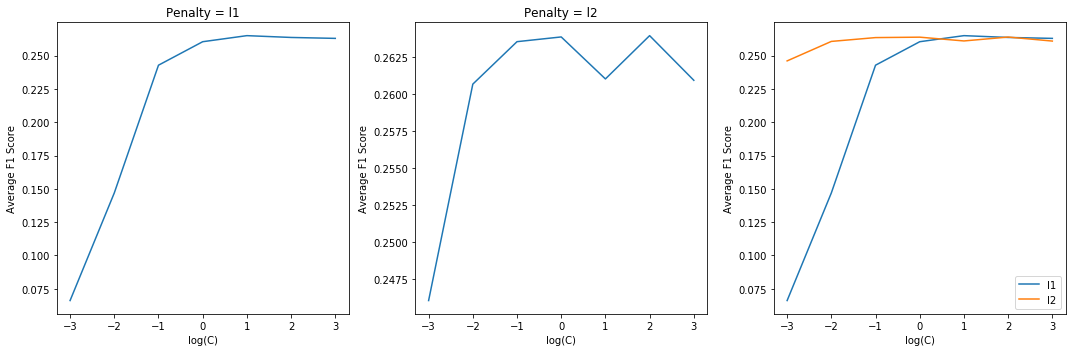

In [105]:
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.plot(np.log10(C),f1_l1)
plt.xlabel('log(C)')
plt.ylabel('Average F1 Score')
plt.title('Penalty = l1')
plt.subplot(132)
plt.plot(np.log10(C),f1_l2)
plt.xlabel('log(C)')
plt.ylabel('Average F1 Score')
plt.title('Penalty = l2')
plt.subplot(133)
plt.plot(np.log10(C),f1_l1, label='l1')
plt.plot(np.log10(C),f1_l2, label='l2')
plt.xlabel('log(C)')
plt.ylabel('Average F1 Score')
plt.legend()

plt.tight_layout()

Es posible que sea mejor clasificar si el paciente tuvo una seizure o no. Entonces:
1 - Recording of seizure activity
0 - Else

In [106]:
y[y==(2 or 3 or 4 or 5)] = 0

In [107]:
f1_l1 = []
for element in C:
    lrm = LogisticRegression(C = element, penalty='l1', solver='saga', tol=0.1, multi_class = 'auto')
    lrm.fit(x_train, y_train)
    f1_score = skm.f1_score(y_test,lrm.predict(x_test),average = 'macro')
    f1_l1.append(f1_score)

In [108]:
f1_l2 = []
for element in C:
    lrm = LogisticRegression(C = element, penalty='l2', solver='saga', tol=0.1, multi_class = 'auto')
    lrm.fit(x_train, y_train)
    f1_score = skm.f1_score(y_test,lrm.predict(x_test),average = 'macro')
    f1_l2.append(f1_score)

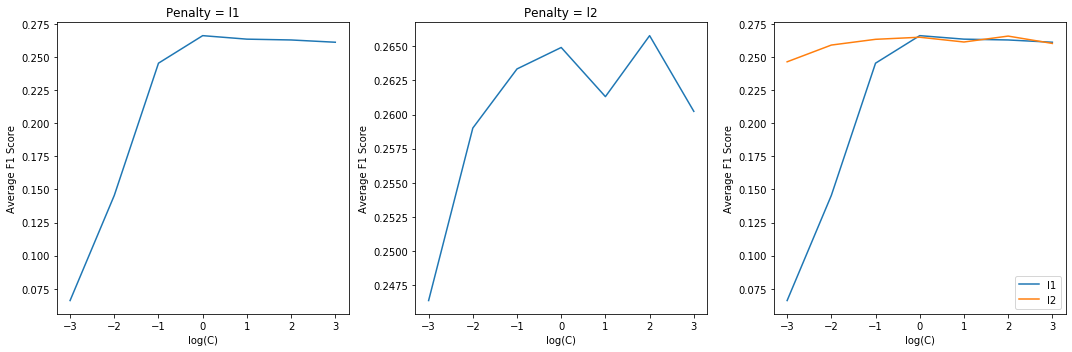

In [109]:
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.plot(np.log10(C),f1_l1)
plt.xlabel('log(C)')
plt.ylabel('Average F1 Score')
plt.title('Penalty = l1')
plt.subplot(132)
plt.plot(np.log10(C),f1_l2)
plt.xlabel('log(C)')
plt.ylabel('Average F1 Score')
plt.title('Penalty = l2')
plt.subplot(133)
plt.plot(np.log10(C),f1_l1, label='l1')
plt.plot(np.log10(C),f1_l2, label='l2')
plt.xlabel('log(C)')
plt.ylabel('Average F1 Score')
plt.legend()

plt.tight_layout()

Para ambos casos, se puede ver que usando como penalty l1, el F1 score empieza a subir hasta asentarse más o menos en 0.275. Mientras que haciendo uso de l2 como penalty, se ve que el f1 score no tiene una tendencia, sino que empieza a tener un comportamiento muy variado. Aún así, se ve que el máximo del f1 score es muy similar al de l1, acercandose a 0.270. Así mismo, es importante mencionar que para l2, se da un F1 score alto para valores altos de C, en este caso en particular, se encuentra el máximo del F1 score en valores de C = 1e2. Mientras que para l1, los máximos se van más hacia el lado de valores de C mayores a 0. Para valores menores a 0, el f1 score haciendo uso de l1 cae muy rapido. Es claro que estos resultados dependen de el dataset siendo usado.